In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

### LOading the data

In [2]:
df = pd.read_csv('train.csv')
df.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
df_1=df.drop(columns=['POSTED_BY','ADDRESS','BHK_OR_RK'],axis=1)

### Doing Feature scaling of some columns

In [4]:
scaler = StandardScaler()
df_1['SQUARE_FT'] = scaler.fit_transform(df_1[['SQUARE_FT']])
df_1['LONGITUDE'] = scaler.fit_transform(df_1[['LONGITUDE']])
df_1['LATITUDE'] = scaler.fit_transform(df_1[['LATITUDE']])
df_1

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2,-0.009731,1,1,-1.342478,0.072011,55.0
1,0,0,2,-0.009744,1,1,-1.454541,-0.018289,51.0
2,0,0,2,-0.009924,1,1,-1.373400,0.075254,43.0
3,0,1,2,-0.009926,1,1,1.183208,0.048004,62.5
4,1,0,2,-0.009890,0,1,0.208204,1.103210,60.5
...,...,...,...,...,...,...,...,...,...
29446,0,0,3,-0.009100,1,1,0.941206,0.114191,45.0
29447,0,0,2,-0.010010,1,1,3.004762,-15.438065,16.0
29448,0,0,2,-0.009877,1,1,0.907066,-0.095637,27.1
29449,0,0,2,-0.009927,1,1,-1.353720,0.321117,67.0


In [5]:
df_1.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,2.945100e+04,2.945100e+04,29451.000000
mean,0.179756,0.317918,2.392279,-1.930101e-18,0.820244,0.929578,-2.055558e-16,-4.301714e-16,142.898746
std,0.383991,0.465675,0.879091,1.000017e+00,0.383991,0.255861,1.000017e+00,1.000017e+00,656.880713
min,0.000000,0.000000,1.000000,-1.041348e-02,0.000000,0.000000,-9.510290e+00,-1.881105e+01,0.250000
25%,0.000000,0.000000,2.000000,-9.941684e-03,1.000000,1.000000,-4.589041e-01,-2.879068e-01,38.000000
50%,0.000000,0.000000,2.000000,-9.797027e-03,1.000000,1.000000,-8.867644e-02,4.607517e-02,62.000000
75%,0.000000,1.000000,3.000000,-9.599462e-03,1.000000,1.000000,9.025768e-01,9.387051e-02,100.000000
max,1.000000,1.000000,20.000000,1.338691e+02,1.000000,1.000000,6.222623e+00,7.210466e+00,30000.000000


### Spliting the data into trainning and testing samples

In [6]:
x = df_1.drop('TARGET(PRICE_IN_LACS)',axis=1)
y = df_1['TARGET(PRICE_IN_LACS)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9 ,random_state=9)

In [7]:
model = XGBRegressor()
df_1.dtypes

UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [8]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [9]:
predicted_value = model.predict(x_train)

In [10]:
score_1 = metrics.r2_score(y_train ,predicted_value)
score_2 = metrics.mean_absolute_error(y_train , predicted_value)
print('r2 error of the data is ',score_1)
print('Mean absolute error of the data is' ,score_2)

r2 error of the data is  0.99887372985516
Mean absolute error of the data is 11.016472142350695


### Scatter plot for real value and the predicted value

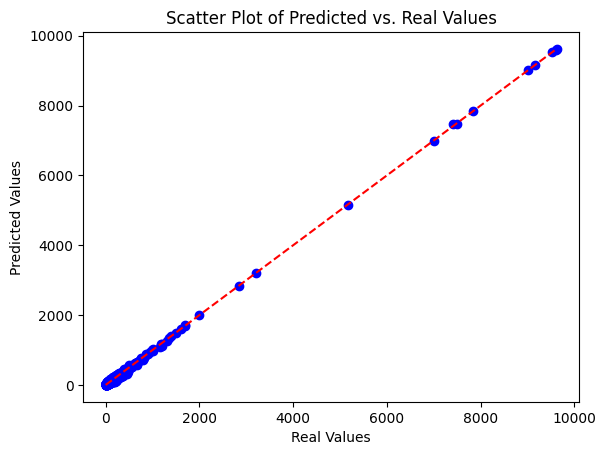

In [11]:
plt.scatter(y_train , predicted_value, color='blue')

# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Real Values')

# Add a line for perfect predictions
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')

# Show plot
plt.show()

### Loading the test data

In [12]:
df_test = pd.read_csv('test.csv')
df_test.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [13]:
df_2=df_test.drop(columns=['POSTED_BY','ADDRESS','BHK_OR_RK'],axis=1)
x_test = df_2

### Predicting the values of x_test data

In [14]:
predicted = model.predict(x_test)

In [15]:
print(predicted)

[ 489.16428 5551.2896   477.42178 ... 5552.352    477.42178  123.50485]


### Appending the predicted value in the data frame

In [16]:
df_2['Predicted price'] = predicted

In [17]:
df_2

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Predicted price
0,0,0,1,545.171340,1,1,21.262000,73.047700,489.164276
1,1,1,2,800.000000,0,0,18.966114,73.148278,5551.289551
2,0,0,2,1257.096513,1,1,22.592200,88.484911,477.421783
3,0,0,3,1400.329489,1,1,26.988300,75.584600,123.504852
4,0,0,1,430.477830,1,1,22.700000,72.870000,489.164276
...,...,...,...,...,...,...,...,...,...
68715,0,1,2,856.555505,1,1,19.180000,72.963330,496.869141
68716,0,1,3,2304.147465,1,1,30.661104,76.746082,142.952240
68717,1,1,1,33362.792750,0,0,19.222101,72.988231,5552.352051
68718,0,0,2,1173.708920,1,1,18.496670,73.941670,477.421783
